In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import TTestIndPower
from statsmodels.api import qqplot

%matplotlib inline

In [2]:
# データのロード
df = sns.load_dataset('tips')
# チップ率を計算
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [3]:
print(f'seaborn version: {sns.__version__}')

seaborn version: 0.12.2


# inferential statistics

## histgram

<Axes: xlabel='tip', ylabel='Count'>

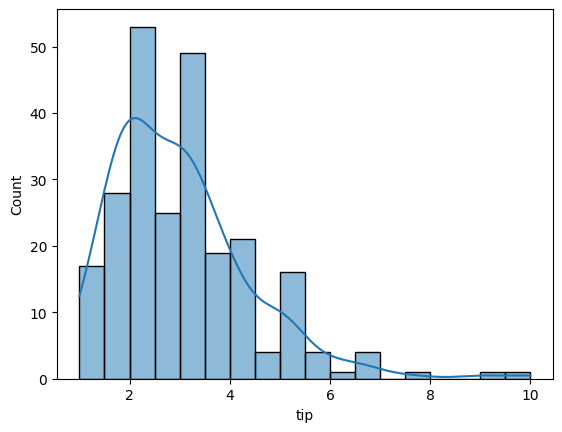

In [4]:
tip = df['tip']
sns.histplot(tip, kde=True)

<Axes: xlabel='tip', ylabel='Count'>

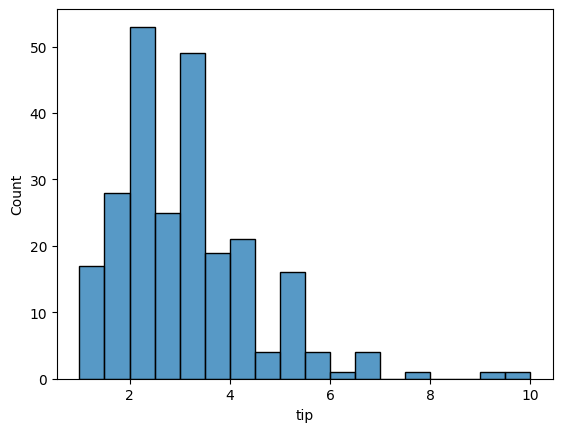

In [5]:
sns.histplot(tip, kde=False)

## catplot

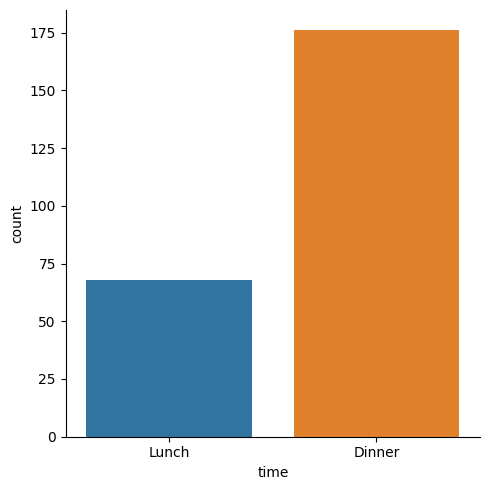

In [6]:
xaxis = 'time'
data = df
sns.catplot(data=data, x=xaxis, kind='count')

## np.mean()

In [7]:
np.mean(df['tip'])

2.99827868852459

In [8]:
np.mean(df['tip_rate'])

0.16080258172250472

In [9]:
df['tip_rate'].mean()

0.16080258172250472

In [10]:
df.groupby('sex').mean(numeric_only=True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


In [11]:
df.groupby('sex').mean(numeric_only=True)['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<Axes: xlabel='sex', ylabel='tip_rate'>

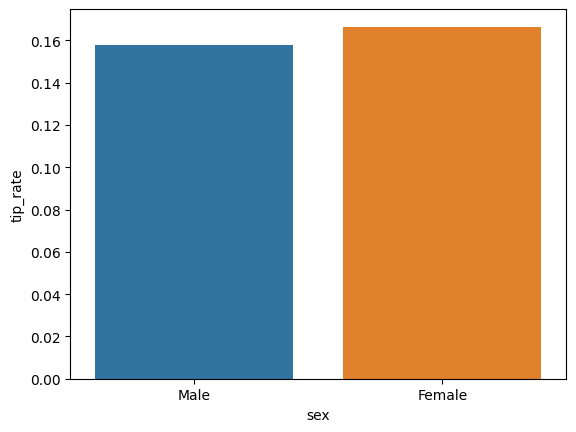

In [12]:
sns.barplot(data=df, x='sex', y='tip_rate', errorbar=None)

<Axes: xlabel='sex'>

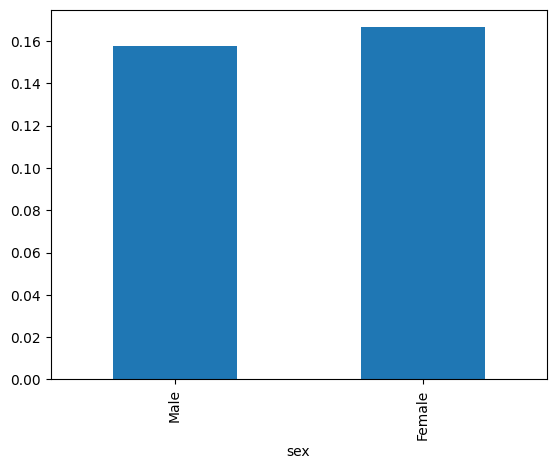

In [13]:
df.groupby('sex').mean(numeric_only=True)['tip_rate'].plot(kind='bar')

## np.median()

In [14]:
np.median(df['tip_rate'])

0.15476977125802577

<Axes: xlabel='tip_rate', ylabel='Count'>

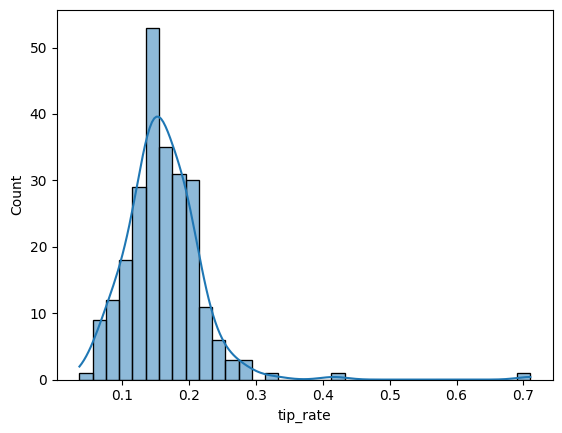

In [15]:
sns.histplot(df['tip_rate'], kde=True)

In [16]:
df['tip_rate'].median()

0.15476977125802577

In [17]:
df.groupby('sex').median(numeric_only=True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<Axes: xlabel='sex', ylabel='tip_rate'>

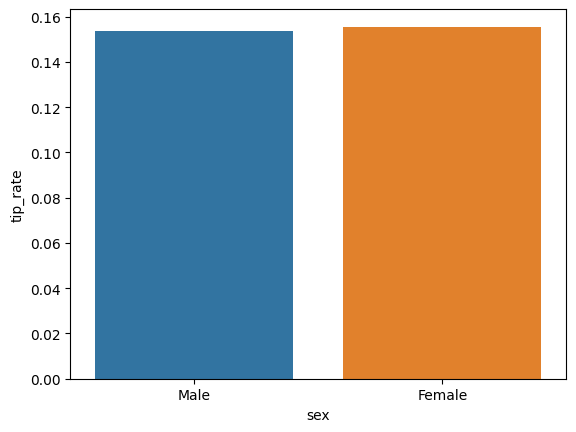

In [18]:
sns.barplot(data=df, x='sex', y='tip_rate', estimator=np.median, errorbar=None)

In [19]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


In [20]:
df.sort_values('tip_rate', ascending=True)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


## stats.mode()

In [21]:
#AttributeError: module 'numpy' has no attribute 'mode'
# np.mode([1, 2, 2, 3, 3, 3, 3, 4])

In [22]:
mode, count = stats.mode([1, 2, 2, 3, 3, 3, 3, 4], keepdims=True)

In [23]:
print(f'mode: {mode[0]}\ncount: {count[0]}')

mode: 3
count: 4


In [24]:
df['size'].mode()

0    2
Name: size, dtype: int64

In [25]:
mode, count = stats.mode(df['size'], keepdims=True)

In [26]:
print(f'mode: {mode[0]}\ncount: {count[0]}')

mode: 2
count: 156


## Scattering degree

### Range

#### min

In [27]:
np.min(df['tip_rate'])

0.03563813585135547

In [28]:
df['tip'].min()

1.0

In [29]:
df.groupby('sex').min(numeric_only=True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


#### max

In [30]:
np.max(df['tip_rate'])

0.710344827586207

In [31]:
df['tip'].max()

10.0

In [32]:
df.groupby('sex').max(numeric_only=True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


### quartile

In [33]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [34]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [35]:
stats.iqr(df['tip_rate'])

0.06234812458689151

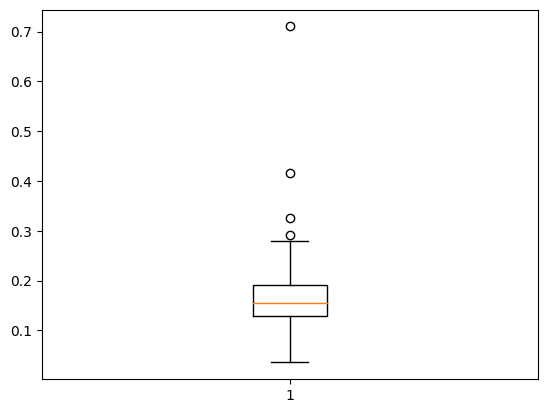

In [36]:
plt.boxplot(df['tip_rate'])
plt.show()

<Axes: >

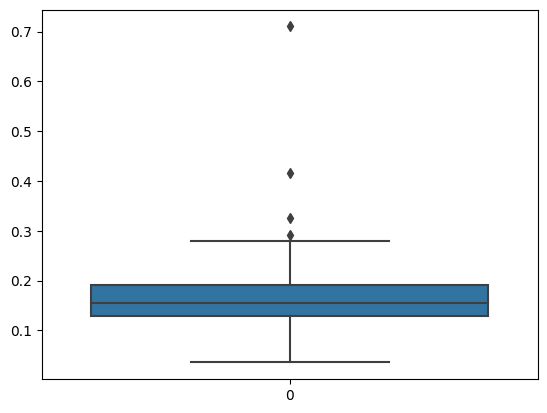

In [37]:
sns.boxplot(df['tip_rate'])

### mean deviation

### variance

In [38]:
np.var(df['tip'])

1.9066085124966412

### standard deviation

In [39]:
np.std(df['tip'])

1.3807999538298954

In [40]:
np.sqrt(np.var(df['tip']))

1.3807999538298954

In [41]:
tip_mean = df['tip'].mean()
tip_mean

2.99827868852459

## covariance

In [42]:
np.cov([1, 2, 3], [-4, 5, 15], bias=True)

array([[ 0.66666667,  6.33333333],
       [ 6.33333333, 60.22222222]])

In [43]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [44]:
np.stack([df['total_bill'], df['tip'], df['size']], axis=0)

array([[16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
        14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
        16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
        12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
        16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
        18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
        25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
        18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
        26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
        16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
        28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
        12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
        18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
        10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
      

In [45]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)

In [46]:
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [47]:
df.cov(numeric_only=True)

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## correlation coefficient

In [48]:
np.corrcoef([1, 2, 3, 4], [5, 6, 7, 8])

array([[1., 1.],
       [1., 1.]])

In [49]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [50]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [51]:
df.corr(numeric_only=True)

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<Axes: >

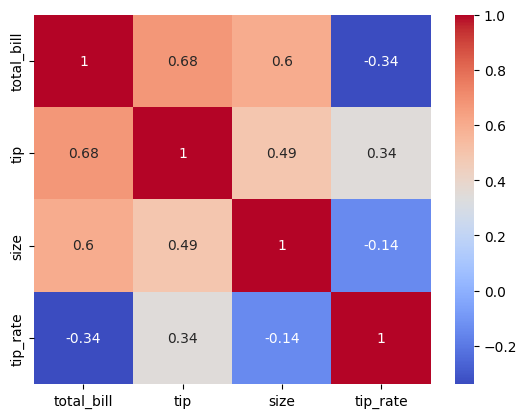

In [52]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)

## association

In [53]:
# pd.crosstab(index, column)
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [54]:
cont_table = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(cont_table, correction=False)

Chi2ContingencyResult(statistic=10.277251918677742, pvalue=0.0013468039268008766, dof=1, expected_freq=array([[ 43.75409836, 113.24590164],
       [ 24.24590164,  62.75409836]]))

## cramers_v fucntion

In [55]:
def cramers_v(x, y) -> float:
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) -1
    n = len(x)
    v = np.sqrt(chi2 / (min_d * n))
    return v

In [56]:
cramers_v(df['sex'], df['time'])

0.20523129613344476

## probability

stats.<確率分布>.<メソッド>

- stats.norm.rvs()
- stats.uniform.pdf()
- stats.randint.mean()
- stats.binorm.cdf()
- stats.poisson.var()
- stats.expon.std()

In [57]:
# rvs: random variates: 確率変量
stats.randint.rvs(1, 7)

3

In [58]:
stats.randint(1, 7).rvs()

2

In [59]:
stats.uniform.rvs()

0.39959785250073765

In [60]:
stats.randint(1, 7).pmf(5)

0.16666666666666666

In [61]:
stats.uniform(1, 7).pdf(3)

0.14285714285714285

In [62]:
def simple_func(x):
    return x ** 2 + 3

In [63]:
x = np.linspace(-3, 3, 100)
y = simple_func(x)

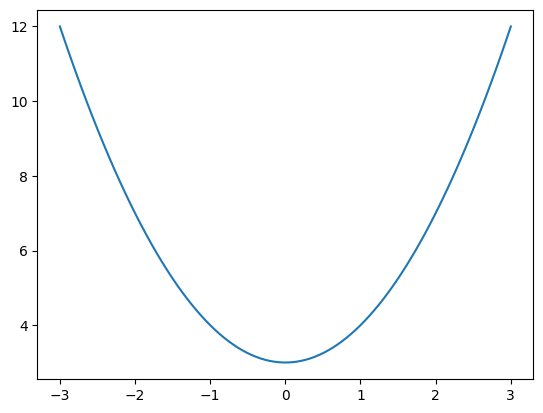

In [64]:
plt.plot(x, y)
plt.show()

In [65]:
x = np.arange(-3, 4)
y = simple_func(x)

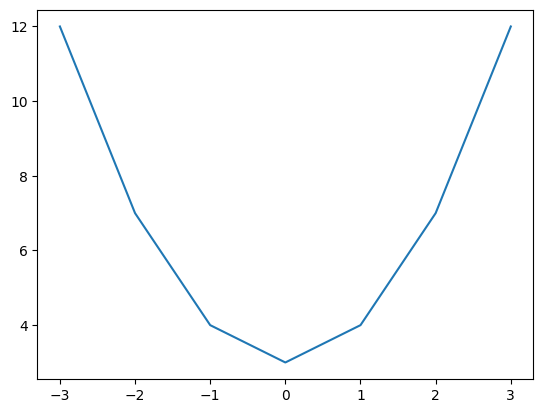

In [66]:
plt.plot(x, y)
plt.show()

In [67]:
stats.randint(1, 7).pmf(1)

0.16666666666666666

### probabilty Mass Function (PMF)

In [68]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)

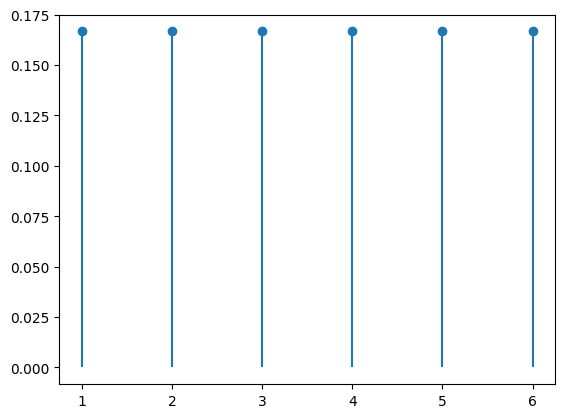

In [69]:
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)
plt.show()

### probabilty Density Function (PDF)

In [70]:
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)

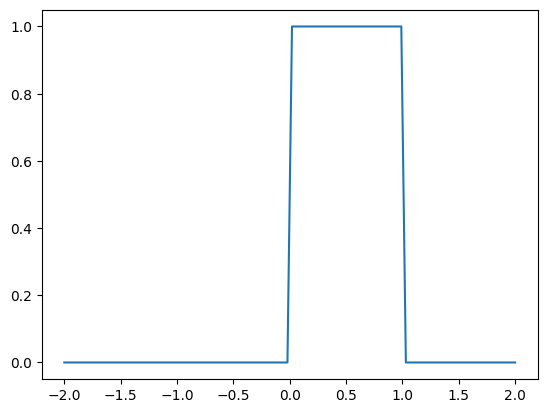

In [71]:
plt.plot(x, y)
plt.show()

## cumulative distribution function (CDF)

In [72]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)

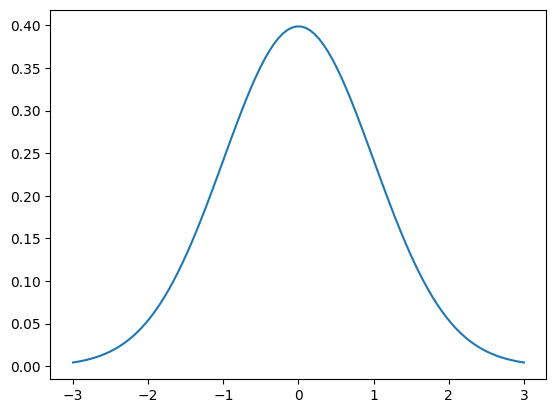

In [73]:
plt.plot(x, y)
plt.show()

In [74]:
x = np.linspace(-3, 3, 100)
y = stats.norm.cdf(x)

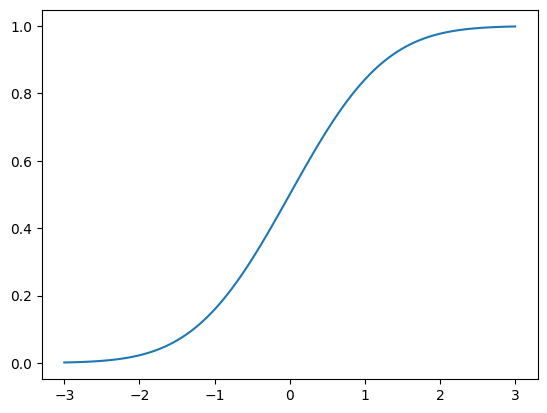

In [75]:
plt.plot(x, y)
plt.show()

### survival function (sf)

In [76]:
x = np.linspace(-3, 3, 100)
y = stats.norm.sf(x)

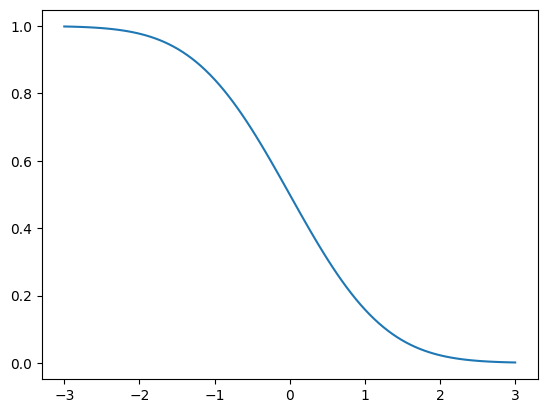

In [77]:
plt.plot(x, y)
plt.show()

## normal distribution

In [78]:
stats.norm(loc=10, scale=3).rvs()

9.974691642986397

In [79]:
x = np.linspace(-5, 15, 100)
y1 = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=9, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=3).pdf(x)

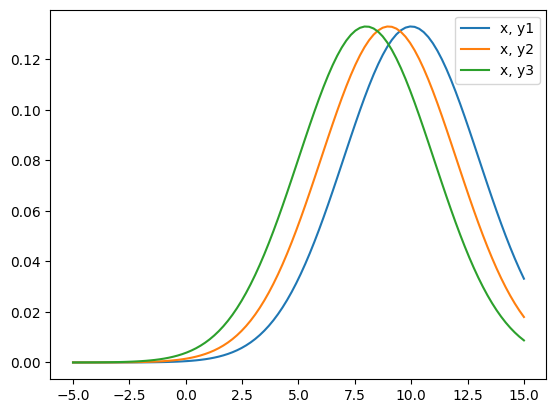

In [80]:
plt.plot(x, y1, label='x, y1')
plt.plot(x, y2, label='x, y2')
plt.plot(x, y3, label='x, y3')
plt.legend()
plt.show()

## kernel density estmation

In [81]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde([1, 1, 2, 2, 3, 3, 3, 4, 5]).pdf(x)

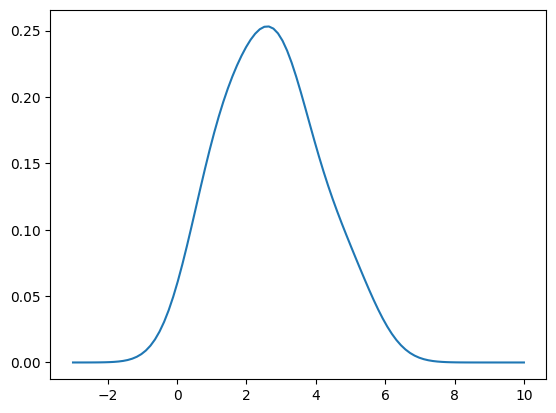

In [82]:
plt.plot(x, y)
plt.show()

In [83]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [84]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df['tip']).pdf(x)

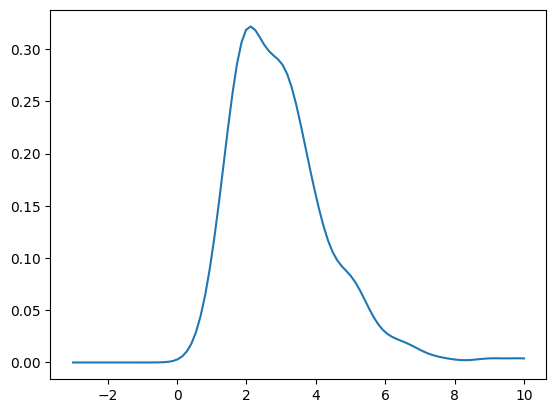

In [85]:
plt.plot(x, y)
plt.show()

<Axes: xlabel='tip', ylabel='Count'>

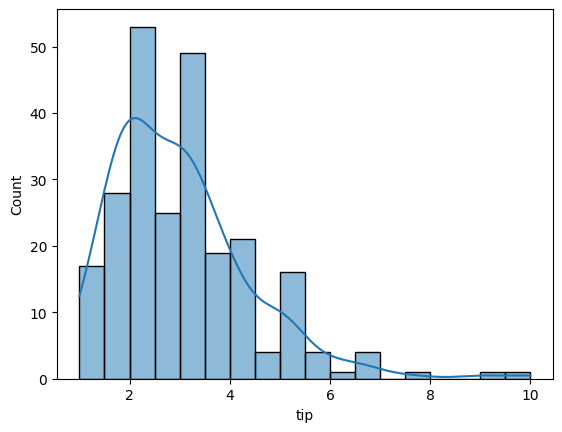

In [86]:
sns.histplot(df['tip'], kde=True)

In [87]:
resample_data = stats.gaussian_kde(df['tip']).resample()
resample_data

array([[2.205271  , 2.92989336, 4.27135419, 4.37305413, 2.8865124 ,
        3.15590586, 3.25543274, 1.52195588, 3.60320007, 2.81365509,
        2.70466607, 2.83938311, 1.8965503 , 4.25019469, 1.7529238 ,
        3.33211645, 1.71561116, 4.36467306, 4.47718813, 1.28726264,
        1.86783325, 2.06300899, 1.19735068, 3.69467343, 2.7983087 ,
        2.68369038, 3.83373315, 3.98184619, 1.8870413 , 2.46314647,
        5.42849795, 1.46503898, 1.42114927, 3.87612803, 3.06366638,
        4.0016491 , 1.47512273, 2.87541963, 2.76851762, 3.58928615,
        5.69436101, 4.21849019, 2.82110505, 2.6846907 , 2.68988689,
        2.49446062, 2.96545471, 1.50482964, 1.63162532, 2.13331748,
        1.20266383, 6.02391818, 6.30328849, 3.89066152, 3.35768026,
        1.90965365, 2.15702367, 4.51452953, 2.2689299 , 2.26954368,
        3.0998168 , 2.936459  , 2.29334444, 1.91524107, 1.55404336,
        2.33613926, 5.16648228, 1.82525188, 2.11451603, 3.32920843,
        4.64111428, 3.76648799, 3.65094595, 2.70

<Axes: ylabel='Count'>

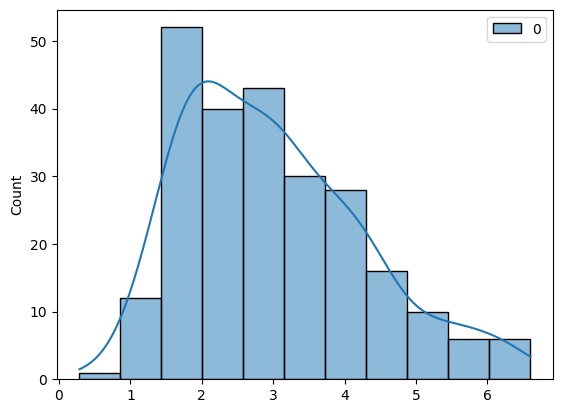

In [88]:
sns.histplot(resample_data.transpose(), kde=True)

## normal distribution

In [89]:
samples = [stats.norm(loc=4, scale=3).rvs() for _ in range(1000)]

In [90]:
len(samples)

1000

In [91]:
# loc = 4
# scale = 3
# groups1 = [res := stats.norm(loc=loc, scale=scale).rvs() for _ in range(1000) if loc - scale < res < loc + scale]

# len(groups1)

# groups2 = [res := stats.norm(loc=loc, scale=scale).rvs() for _ in range(1000) if loc - 2 * scale < res < loc + 2 * scale]

# len(groups2)

# groups3 = [res := stats.norm(loc=loc, scale=scale).rvs() for _ in range(1000) if loc - 3 * scale < res < loc + 3 * scale]

# len(groups3)

In [92]:
group1 = []
group2 = []
group3 = []
samples = []
loc = 4
scale = 3

for _ in range(100000):
    sample = stats.norm(loc=loc, scale=scale).rvs()
    if loc - scale < sample < loc + scale:
        group1.append(sample)
    elif loc - 2 * scale < sample < loc + 2 * scale:
        group2.append(sample)
    elif loc - 3 * scale < sample < loc + 3 * scale:
        group3.append(sample)
    samples.append(sample)

In [93]:
print(f'group1: {len(group1) / len(samples)}')
print(f'group2: {(len(group1) + len(group2)) / len(samples)}')
print(f'group3: {(len(group1) + len(group2) + len(group3)) / len(samples)}')

group1: 0.68341
group2: 0.95369
group3: 0.99733


## standardization

In [94]:
scaler = StandardScaler()

In [95]:
scaler.fit_transform([[1], [2], [3], [4]])

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [96]:
df[('tip_rate')].values.reshape(-1, 1)

array([[0.05944673],
       [0.16054159],
       [0.16658734],
       [0.13978041],
       [0.14680765],
       [0.18623962],
       [0.22805017],
       [0.11607143],
       [0.13031915],
       [0.21853857],
       [0.16650438],
       [0.14180374],
       [0.10181582],
       [0.16277808],
       [0.20364127],
       [0.18164968],
       [0.16166505],
       [0.22774708],
       [0.20624632],
       [0.1622276 ],
       [0.22767857],
       [0.13553475],
       [0.14140774],
       [0.19228818],
       [0.160444  ],
       [0.13138686],
       [0.14958863],
       [0.15760441],
       [0.19815668],
       [0.15267176],
       [0.15183246],
       [0.13623978],
       [0.19920319],
       [0.11841469],
       [0.18391451],
       [0.14962594],
       [0.12262416],
       [0.18133491],
       [0.12359551],
       [0.15989767],
       [0.13965087],
       [0.14547537],
       [0.2195122 ],
       [0.13636364],
       [0.18421053],
       [0.16402406],
       [0.22492128],
       [0.185

In [97]:
scaler.fit_transform(df[('tip_rate')].values.reshape(-1, 1))

array([[-1.66301817e+00],
       [-4.28234299e-03],
       [ 9.49146717e-02],
       [-3.44925940e-01],
       [-2.29624968e-01],
       [ 4.17363756e-01],
       [ 1.10337948e+00],
       [-7.33936144e-01],
       [-5.00163567e-01],
       [ 9.47315739e-01],
       [ 9.35535257e-02],
       [-3.11727577e-01],
       [-9.67838090e-01],
       [ 3.24134057e-02],
       [ 7.02885077e-01],
       [ 3.42053237e-01],
       [ 1.41511894e-02],
       [ 1.09840651e+00],
       [ 7.45627991e-01],
       [ 2.33813456e-02],
       [ 1.09728238e+00],
       [-4.14587519e-01],
       [-3.18225155e-01],
       [ 5.16606793e-01],
       [-5.88357399e-03],
       [-4.82644844e-01],
       [-1.83995336e-01],
       [-5.24746516e-02],
       [ 6.12895542e-01],
       [-1.33408300e-01],
       [-1.47179215e-01],
       [-4.03019490e-01],
       [ 6.30066304e-01],
       [-6.95488521e-01],
       [ 3.79214012e-01],
       [-1.83383264e-01],
       [-6.26420825e-01],
       [ 3.36888626e-01],
       [-6.1

In [98]:
scaled = scaler.fit_transform(df[['tip_rate', 'tip']])
scaled * 10 + 50

array([[ 33.36981828,  35.60053045],
       [ 49.95717657,  40.3079466 ],
       [ 50.94914672,  53.63355539],
       [ 46.5507406 ,  52.25754144],
       [ 47.70375032,  54.43019505],
       [ 54.17363756,  62.3965916 ],
       [ 61.03379478,  42.77028736],
       [ 42.66063856,  50.88152749],
       [ 44.99836433,  42.48060021],
       [ 59.47315739,  51.67816714],
       [ 50.93553526,  40.67005554],
       [ 46.88272423,  64.49682342],
       [ 40.3216191 ,  39.65615052],
       [ 50.32413406,  50.01246605],
       [ 57.02885077,  50.15730962],
       [ 53.42053237,  56.67527044],
       [ 50.14151189,  40.38036839],
       [ 60.98406513,  55.15441291],
       [ 57.45627991,  53.63355539],
       [ 50.23381346,  52.54722859],
       [ 60.97282376,  57.83401903],
       [ 45.85412481,  48.20192137],
       [ 46.81774845,  44.43598845],
       [ 55.16606793,  83.18164444],
       [ 49.94116426,  51.31605821],
       [ 45.17355156,  45.23262811],
       [ 48.16004664,  42.77028736],
 

## binomial distribution

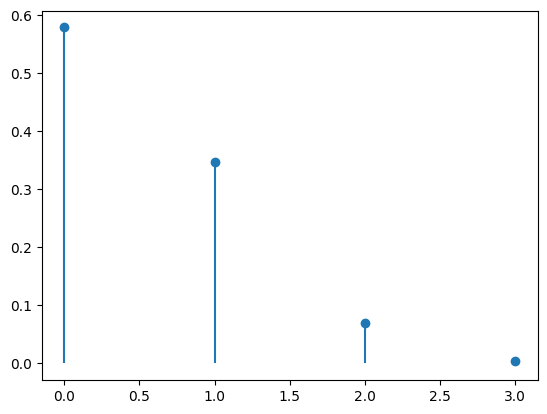

In [99]:
n = 3
x = np.arange(n + 1)
y = stats.binom(n=n, p=1/6).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)
plt.show()

## binominal -> normal distribution

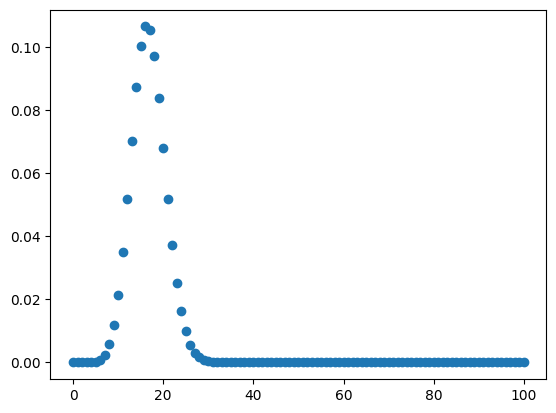

In [100]:
n = 100
p = 1/6
x = np.arange(n + 1)
binorm_y = stats.binom(n, p).pmf(x)
plt.plot(x, binorm_y, 'o')
plt.show()

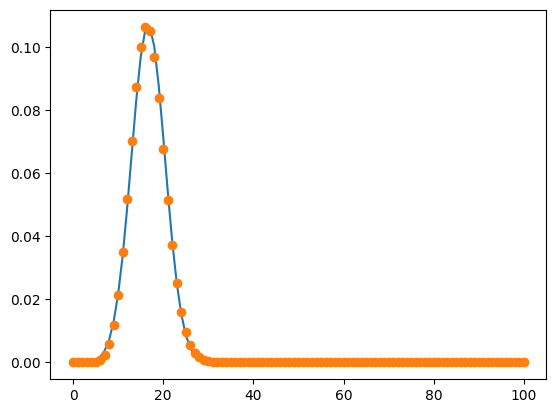

In [101]:
norm_y = stats.norm(n * p, np.sqrt(n * p *(1 - p))).pdf(x)
plt.plot(x, norm_y)
plt.plot(x, binorm_y, 'o')
plt.show()

In [102]:
stats.binom(n, p).mean()

16.666666666666664

In [103]:
stats.binom(n, p).var()

13.888888888888888

# descriptive statistics

In [104]:
max_itr = 100
n = 100
sample_means = []
for _ in range(max_itr):
    sampled_df = df.sample(n)
    sample_mean = sampled_df['tip'].mean()
    sample_means.append(sample_mean)

In [105]:
sample_means[:10]

[2.7283,
 2.8427000000000002,
 3.0707,
 3.0084,
 2.9894,
 3.0485,
 3.0358000000000005,
 2.9964,
 3.1269,
 2.9941000000000004]

In [106]:
# mean
np.mean(sample_means)

3.0043499999999996

In [107]:
# population mean
target_column = 'tip'
df[target_column].mean()

2.99827868852459

In [108]:
# variance
np.var(sample_means)

0.008724304099999998

In [109]:
# population mean / n
np.var(df[target_column]) / n

0.019066085124966412

<Axes: ylabel='Count'>

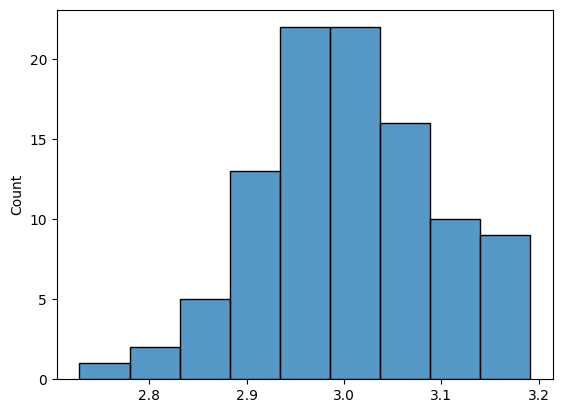

In [110]:
sns.histplot(sample_means)

<Axes: xlabel='tip', ylabel='Count'>

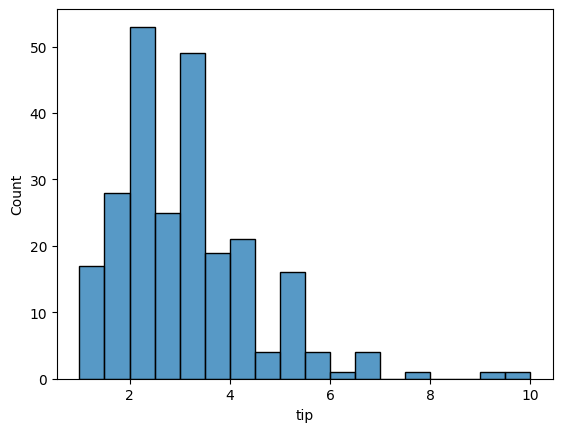

In [111]:
sns.histplot(df[target_column])

## unbiased variance

In [112]:
stats.tvar(df['tip'])

1.914454638062471

In [113]:
np.var(df['tip'], ddof=1)

1.914454638062471

In [114]:
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [115]:
stats.tstd(df['tip'])

1.3836381890011822

In [116]:
np.std(df['tip'], ddof=1)

1.3836381890011822

In [117]:
rows = 50
max_iters = 1000
column = 'tip'
sample_vars = []
sample_uvars = []
for _ in range(max_iters):
    sample_df = df.sample(rows)
    sample_var = np.var(sample_df[column])
    sample_uvar = stats.tvar(sample_df[column])
    sample_vars.append(sample_var)
    sample_uvars.append(sample_uvar)

In [118]:
sample_vars[:10]

[1.91833696,
 2.2017050000000005,
 1.24624324,
 1.66582976,
 1.54335556,
 1.7031144400000002,
 2.4009329999999998,
 1.4635115600000004,
 1.4021977599999997,
 1.6968192400000004]

In [119]:
# 標本の不変分散の平均
np.mean(sample_vars)

1.8728414877600001

In [120]:
# 母分散
np.var(df[column])

1.9066085124966412

In [121]:
# 標本の分散の平均
np.mean(sample_vars)

1.8728414877600001

In [122]:
sample_uvars[:10]

[1.957486693877551,
 2.246637755102041,
 1.271676775510204,
 1.6998262857142858,
 1.574852612244898,
 1.7378718775510207,
 2.449931632653061,
 1.4933791428571432,
 1.4308140408163261,
 1.731448204081633]

<Axes: ylabel='Count'>

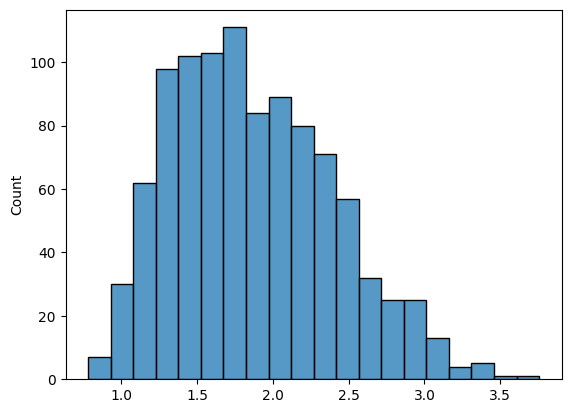

In [123]:
sns.histplot(sample_vars)

<Axes: ylabel='Count'>

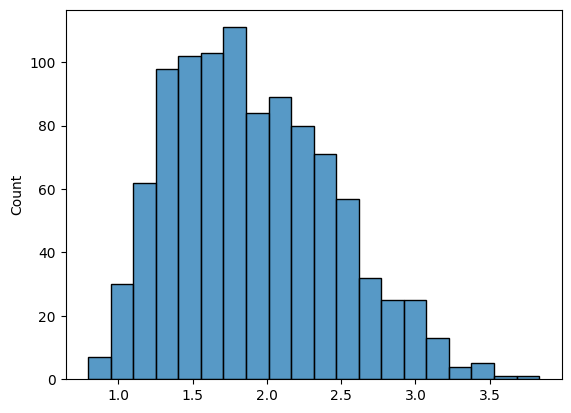

In [124]:
sns.histplot(sample_uvars)

## confidence interval

In [125]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [126]:
print(df.shape)
df.head()

(244, 8)


,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [127]:
rows = 50
iters = 100
alpha = 0.95
population_male_ratio = len(df[df['sex'] == 'Male']) / len(df)
results = []
for _ in range(iters):
    sample_df = df.sample(rows)
    male_ratio = len(sample_df[sample_df['sex'] == 'Male']) / len(sample_df)
    min_num, max_num = stats.binom.interval(alpha, n=rows, p=male_ratio)
    min_ratio = min_num / n
    max_ratio = max_num / n
    correct = min_ratio < population_male_ratio < max_ratio
    results.append({"min": min_ratio, "max": max_ratio, "correct": correct})

In [128]:
result_df = pd.DataFrame(results)
result_df['correct'].value_counts()

False    100
Name: correct, dtype: int64

In [129]:
min_ratio = min_num / n
print(f"min_ratio: {min_ratio}")
max_ratio = max_num / n
print(f"max_ratio: {max_ratio}")
correct = min_ratio < population_male_ratio < max_ratio
print(f"min_ratio: {min_ratio}")
print(f"population_male_ratio: {population_male_ratio}")
print(f"max_ratio: {max_ratio}")

min_ratio: 0.21
max_ratio: 0.35
min_ratio: 0.21
population_male_ratio: 0.6434426229508197
max_ratio: 0.35


In [130]:
len(df[df['sex'] == 'Male']) / len(df)

0.6434426229508197

In [131]:
correct

False

## mean condidence interval

In [132]:
column = 'tip'
alpha = 0.95
n = 50
population_mean = df[column].mean()
iters = 100
results = []
for _ in range(iters):
    sample_df = df.sample(n)
    sample_mean = sample_df[column].mean()
    sample_var = stats.tvar(sample_df[column])
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    correct = min_val < population_mean < max_val
    results.append({'min': min_val, 'max': max_val, 'correct': correct})

In [133]:
result_df = pd.DataFrame(results)
result_df['correct'].value_counts()

True     94
False     6
Name: correct, dtype: int64

In [134]:
population_mean

2.99827868852459

## t-distribution

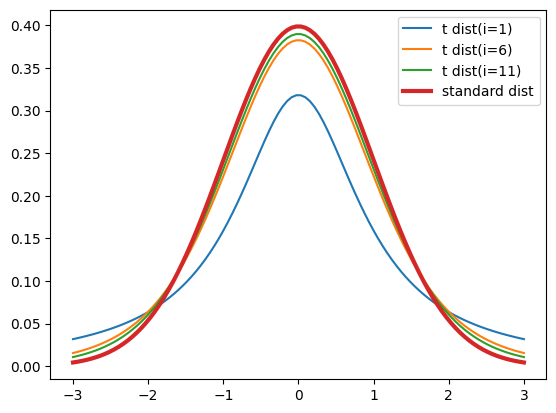

In [135]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for i in range(1, 12, 5):
    t = stats.t(i).pdf(x)
    plt.plot(x, t, label=f"t dist(i={i})")
plt.plot(x, z, label="standard dist", linewidth=3)
plt.legend()
plt.show()

In [136]:
column = 'tip'
alpha = 0.95
rows = 50
population_mean = df[column].mean()
sample_df = df.sample(rows)
sample_mean = sample_df[column].mean()
sample_var = stats.tvar(sample_df[column])
min_val_norm, max_val_norm = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/rows))
min_val_t, max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/rows), df=rows-1)

In [137]:
population_mean

2.99827868852459

In [138]:
sample_mean

2.9795999999999996

In [139]:
print(f"min_val_norm: {min_val_norm}")
print(f"max_val_norm: {max_val_norm}")

min_val_norm: 2.5957594415271488
max_val_norm: 3.3634405584728504


In [140]:
print(f"min_val_t: {min_val_t}")
print(f"max_val_t: {max_val_t}")

min_val_t: 2.5860435436651334
max_val_t: 3.3731564563348657


## Z-test

In [141]:
proportions_ztest([30, 33], [1000, 1000], alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)

## Chi2 

In [142]:
obs = [[15, 5], [15, 65]]
stats.chi2_contingency(obs, correction=False)

Chi2ContingencyResult(statistic=24.107142857142858, pvalue=9.112167294252327e-07, dof=1, expected_freq=array([[ 6., 14.],
       [24., 56.]]))

In [143]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)

In [144]:
count1 = sample_df1['time'].value_counts()['Dinner']
count2 = sample_df2['time'].value_counts()['Dinner']

In [145]:
# Z
proportions_ztest([count1, count2], [n, n], alternative='two-sided')

(-0.6380091150886695, 0.5234677465852955)

In [146]:
# Chi2
sample1_freq = sample_df1['time'].value_counts().values
sample2_freq = sample_df2['time'].value_counts().values

stats.chi2_contingency([sample1_freq, sample2_freq], correction=False)

Chi2ContingencyResult(statistic=0.40705563093622793, pvalue=0.5234677465852949, dof=1, expected_freq=array([[33.5, 16.5],
       [33.5, 16.5]]))

## T-test (Student Test)

In [147]:
male_tips = df[df['sex'] == 'Male']['tip_rate']
female_tips = df[df['sex'] == 'Female']['tip_rate']

In [148]:
print(f"male: {np.var(male_tips):.5f}\nfemale: {np.var(female_tips):.5f}")

male: 0.00417
female: 0.00284


In [149]:
print(f"male: {np.mean(male_tips):.2f}\nfemale: {np.mean(female_tips):.2f}")

male: 0.16
female: 0.17


In [150]:
stats.ttest_ind(male_tips, female_tips)

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

In [151]:
stats.ttest_ind(male_tips, female_tips, equal_var=False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

<Axes: xlabel='tip_rate', ylabel='Count'>

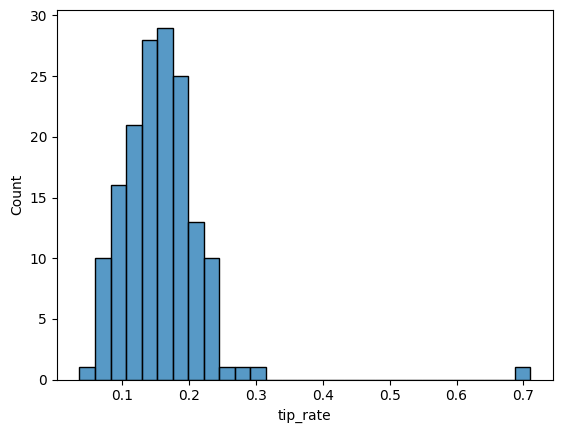

In [152]:
sns.histplot(male_tips)

<Axes: xlabel='tip_rate', ylabel='Count'>

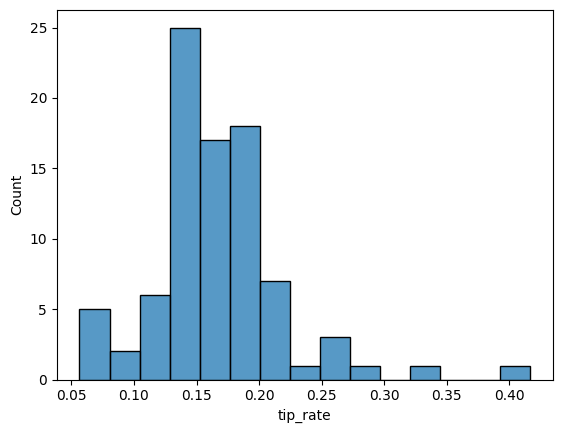

In [153]:
sns.histplot(female_tips)

<Axes: xlabel='tip_rate', ylabel='Count'>

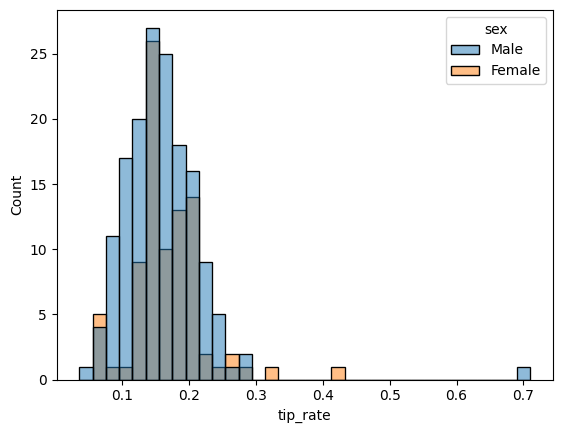

In [154]:
sns.histplot(df, x='tip_rate', hue='sex')

<Axes: xlabel='sex', ylabel='tip_rate'>

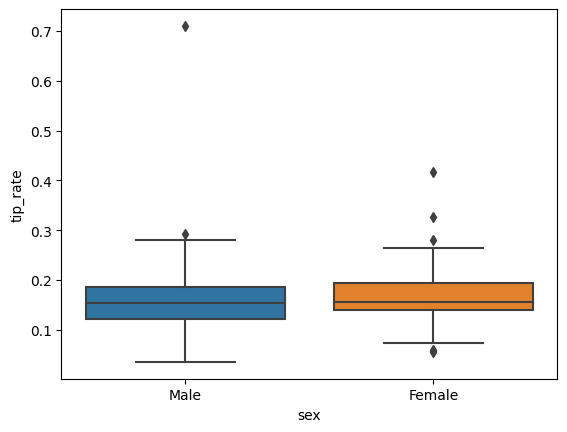

In [155]:
sns.boxplot(data=df, x='sex', y='tip_rate')

## Quantile-Quantile Plot

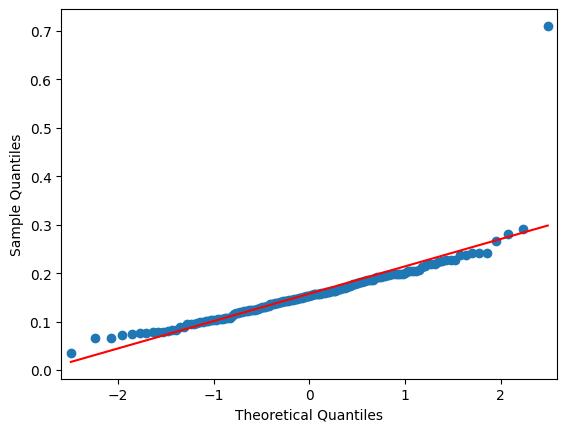

In [156]:
fig = qqplot(male_tips, line='r')

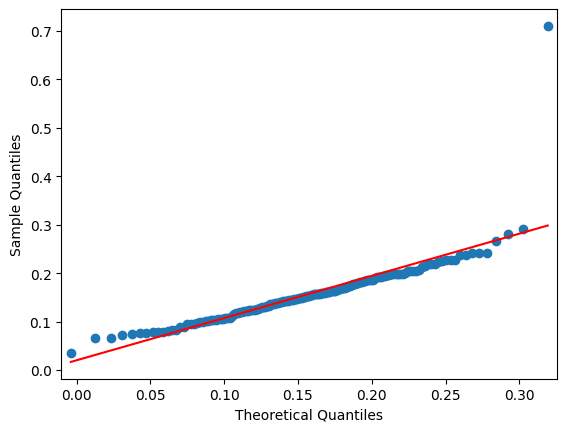

In [157]:
fig = qqplot(male_tips, line='r', dist=stats.norm(loc=np.mean(male_tips), scale=np.sqrt(stats.tvar(male_tips))))

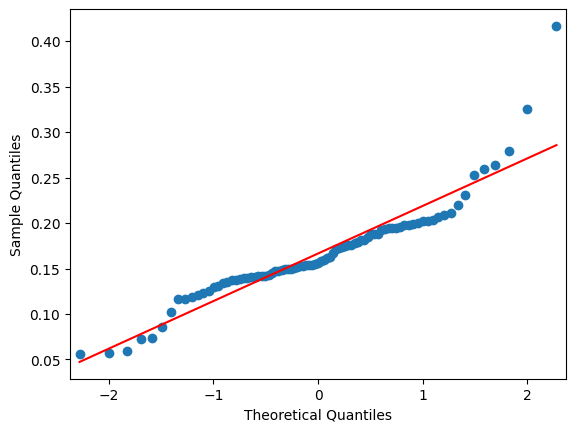

In [158]:
fig = qqplot(female_tips, line='r')

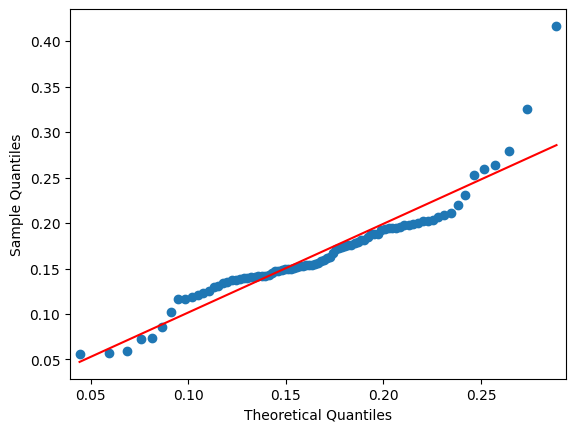

In [159]:
fig = qqplot(female_tips, line='r', dist=stats.norm(loc=np.mean(female_tips), scale=np.sqrt(stats.tvar(female_tips))))

## Shapiro

In [160]:
stats.shapiro(male_tips)

ShapiroResult(statistic=0.7447848916053772, pvalue=3.2243768151486588e-15)

In [161]:
stats.shapiro(female_tips)

ShapiroResult(statistic=0.8982975482940674, pvalue=4.718069249065593e-06)

In [162]:
stats.shapiro(np.sort(male_tips)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

In [163]:
stats.shapiro(np.sort(female_tips)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

## F-test

In [164]:
stats.f(3, 3).pdf(1)

0.31830988618379075

In [165]:
stats.f.pdf(1, dfn=3, dfd=3)

0.31830988618379075

In [166]:
x = np.linspace(0, 3, 100)
y = stats.f.pdf(x, dfn=3, dfd=3)

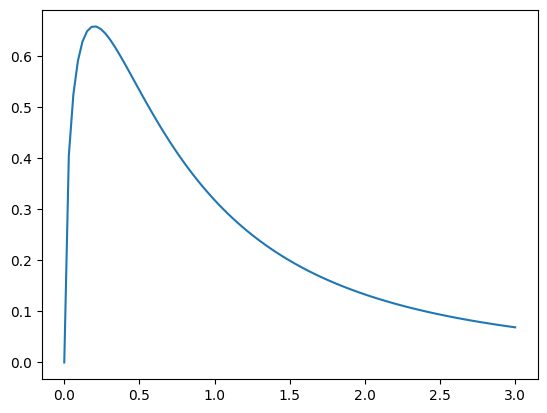

In [167]:
plt.plot(x, y)

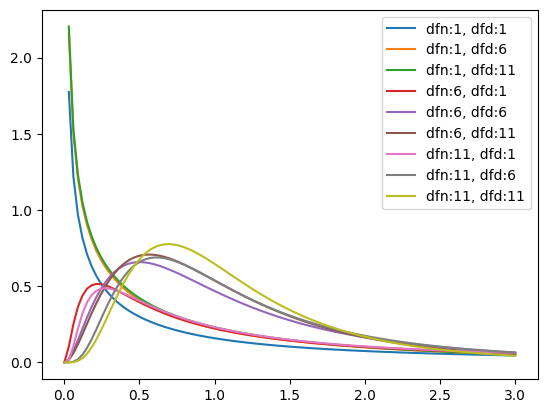

In [168]:
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
        plt.plot(x, y, label=f'dfn:{dfn}, dfd:{dfd}')
plt.legend()
plt.show()

In [169]:
n1 = len(male_tips)
n2 = len(female_tips)
dfn = n1 -1
dfd = n2 -1
var1 = stats.tvar(male_tips)
var2 = stats.tvar(female_tips)
f = var1 / var2
print(f'f: {f}')

f: 1.4588472200534603


In [170]:
stats.f(dfn=dfn, dfd=dfd).sf(f)

0.027100863454374447

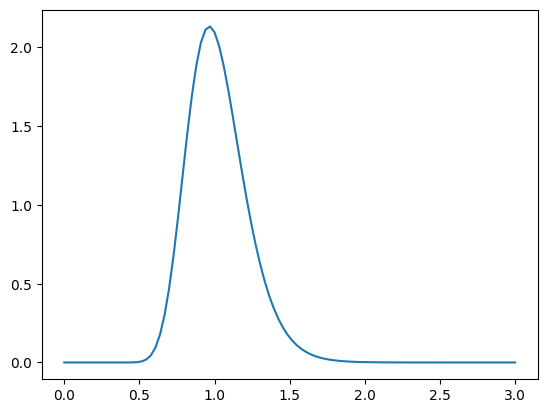

In [171]:
x = np.linspace(0, 3, 100)
y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
plt.plot(x, y)
plt.show()

In [172]:
bp_df = pd.read_csv("blood_pressure.csv")
bp_df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [173]:
bp_df.describe

<bound method NDFrame.describe of      patient     sex agegrp  bp_before  bp_after
0          1    Male  30-45        143       153
1          2    Male  30-45        163       170
2          3    Male  30-45        153       168
3          4    Male  30-45        153       142
4          5    Male  30-45        146       141
..       ...     ...    ...        ...       ...
115      116  Female    60+        152       152
116      117  Female    60+        161       152
117      118  Female    60+        165       174
118      119  Female    60+        149       151
119      120  Female    60+        185       163

[120 rows x 5 columns]>

In [174]:
bp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [175]:
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'])

TtestResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823, df=119)

In [176]:
bp_df['bp_before'].mean()

156.45

In [177]:
bp_df['bp_after'].mean()

151.35833333333332

In [178]:
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']
bp_df

,patient,sex,agegrp,bp_before,bp_after,delta
0,1,Male,30-45,143,153,-10
1,2,Male,30-45,163,170,-7
2,3,Male,30-45,153,168,-15
3,4,Male,30-45,153,142,11
4,5,Male,30-45,146,141,5
...,...,...,...,...,...,...
115,116,Female,60+,152,152,0
116,117,Female,60+,161,152,9
117,118,Female,60+,165,174,-9
118,119,Female,60+,149,151,-2


In [179]:
bp_df['delta'].mean()

5.091666666666667

<Axes: >

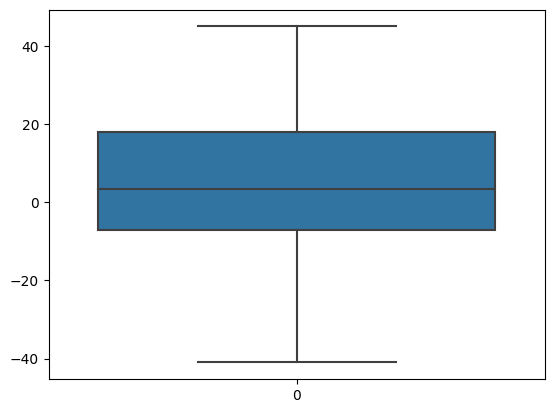

In [180]:
sns.boxplot(bp_df['delta'])